In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
# define parameters
N = 10

T_MAX = 5.0
T_MIN = 1.0
T_NUM = 31

EQ_STEPS = int(1E4)
AVG_STEPS = int(1E2)

T_arr = np.linspace(T_MAX, T_MIN, T_NUM)
energy, magnetization, C, X = np.zeros(T_NUM), np.zeros(T_NUM), np.zeros(T_NUM), np.zeros(T_NUM)
n1, n2 = 1.0 / (AVG_STEPS * N * N), 1.0 / (AVG_STEPS * AVG_STEPS * N * N)

In [37]:
# generate ising lattice
def lattice_init(N):
    lattice = 2 * np.random.randint(2, size=(N, N), dtype=int) - 1
    return lattice 

# Monte-Carlo move
def mcmove(lattice, T):
    for i in range(N):
        for j in range(N):
            x = np.random.randint(0, N)
            y = np.random.randint(0, N)
            # the sum of the neighbors spins
            neighbors_sum = lattice[(x + 1) % N, y] + lattice[x, (y + 1) % N] + lattice[(x - 1) % N, y] + lattice[x, (y - 1) % N]
            # delta energy
            dE = 2 * lattice[x, y] * neighbors_sum

            if (dE < 0 or np.random.rand() < np.exp(-dE / T)):
                lattice[x, y] *= -1
    return lattice 

# Calculate Energy
def calc_energy(lattice):
    E = 0
    for x in range(N):
        for y in range(N):
            neighbors_sum = lattice[(x + 1) % N, y] + lattice[x, (y + 1) % N] + lattice[(x - 1) % N, y] + lattice[x, (y - 1) % N]
            E += - neighbors_sum * lattice[x, y]
    return E / 2

# Calculate Magnetization
def calc_mag(lattice):
    return np.sum(lattice)

In [38]:
# init lattice
lattice = lattice_init(N)
for step in range(EQ_STEPS * 10):
    lattice = mcmove(lattice, T_MAX)

for i, T in enumerate(T_arr):
    print(f"T={T:.2f}")
    E1 = M1 = E2 = M2 = 0
    iT = 1.0 / T
    iT2 = iT * iT

    # equilibrate
    for step in range(EQ_STEPS):
        lattice = mcmove(lattice, T)

    # calculate the energy and magnetization
    for step in range(AVG_STEPS):
        lattice = mcmove(lattice, T)
        E = calc_energy(lattice)
        mag = calc_mag(lattice)

        E1 = E1 + E
        M1 = M1 + mag 
        M2 = M2 + mag * mag 
        E2 = E2 + E * E

    energy[i] = n2 * E1
    magnetization[i] = n1 * M1
    C[i] = (n1 * E2 - n2 * E1 * E1) * iT2
    X[i] = (n1 * M2 - n2 * M1 * M1) * iT

T=5.00
T=4.87
T=4.73
T=4.60
T=4.47
T=4.33
T=4.20
T=4.07
T=3.93
T=3.80
T=3.67
T=3.53
T=3.40
T=3.27
T=3.13
T=3.00
T=2.87
T=2.73
T=2.60
T=2.47
T=2.33
T=2.20
T=2.07
T=1.93
T=1.80
T=1.67
T=1.53
T=1.40
T=1.27
T=1.13
T=1.00


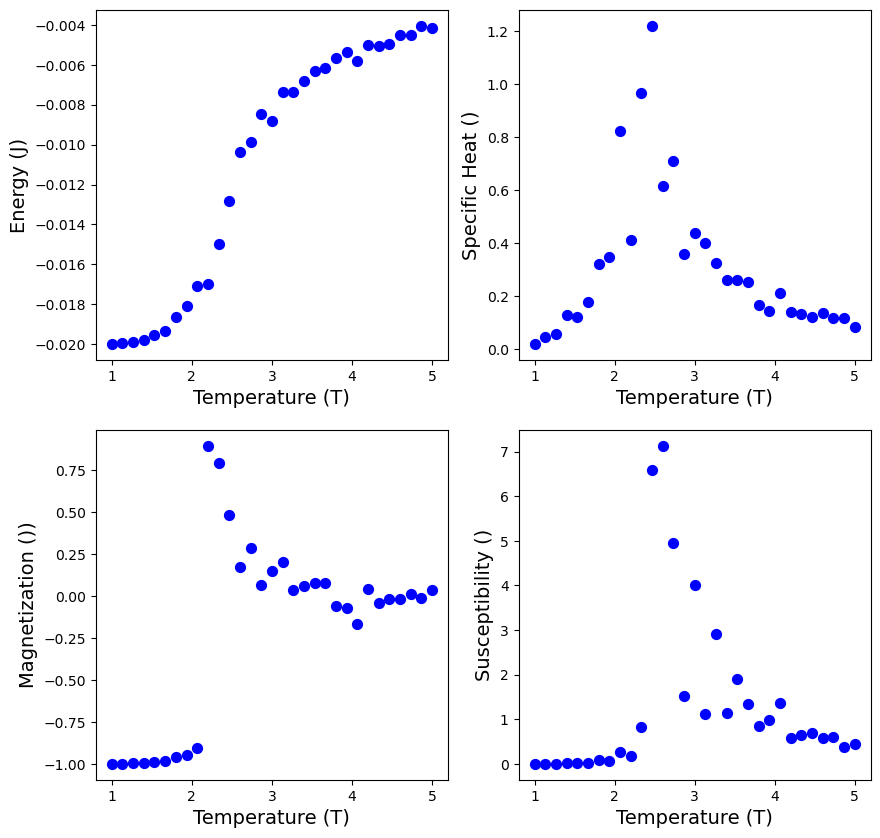

In [39]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0, 0].scatter(T_arr, energy, s=50, marker='o', color='Blue');
ax[0, 0].set_xlabel('Temperature (T)', fontsize=14);
ax[0, 0].set_ylabel('Energy (J)', fontsize=14);

ax[1, 0].scatter(T_arr, magnetization, s=50, marker='o', color='Blue');
ax[1, 0].set_xlabel('Temperature (T)', fontsize=14);
ax[1, 0].set_ylabel('Magnetization ())', fontsize=14);

ax[0, 1].scatter(T_arr, C, s=50, marker='o', color='Blue');
ax[0, 1].set_xlabel('Temperature (T)', fontsize=14);
ax[0, 1].set_ylabel('Specific Heat ()', fontsize=14);

ax[1, 1].scatter(T_arr, X, s=50, marker='o', color='Blue');
ax[1, 1].set_xlabel('Temperature (T)', fontsize=14);
ax[1, 1].set_ylabel('Susceptibility ()', fontsize=14);